In [249]:
import pandas as pd
import importlib
import functions
importlib.reload(functions)

from functions import analyse_statistique_et_asymetire,changer_louer_vendre,changer_nom_ville,nettoyer_prix,remplacer_valuer_null,analyse_categorique,detecter_et_plot_zscore,detecter_aberrantes_par_frequence_nombre,detecter_avec_IQR

In [250]:

data = pd.read_csv(r'/home/rajarabii/projects/data_analyse_avito/data/appartements_data.csv')

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1062 non-null   object 
 1   price          930 non-null    object 
 2   location       1062 non-null   object 
 3   type_de_vente  386 non-null    object 
 4   salon          640 non-null    float64
 5   chamber        339 non-null    float64
 6   toilete        336 non-null    float64
 7   area           693 non-null    float64
 8   link           1063 non-null   object 
dtypes: float64(4), object(5)
memory usage: 74.9+ KB


In [252]:
df = data.copy()
df.head(4)

,title,price,location,type_de_vente,salon,chamber,toilete,area,link
0,Appartement location de vacances à Meknès,300 DH /Nuit,Meknès,NaN,NaN,NaN,NaN,NaN,https://www.avito.ma/fr/autre_secteur/location...
1,appartement à louer,2 400 DH,Casablanca,NaN,1.0,NaN,NaN,50.0,https://www.avito.ma/fr/al_qods/appartements/a...
2,Appartement beru à louer 150 m² à Temara,6 500 DH,Temara,NaN,1.0,NaN,NaN,150.0,https://www.avito.ma/fr/autre_secteur/appartem...
3,Appartement près a casanearshor sidi maarouf,3 000 DH,Casablanca,NaN,1.0,NaN,NaN,56.0,https://www.avito.ma/fr/sidi_maarouf/apparteme...


In [253]:
df.describe()

,salon,chamber,toilete,area
count,640.000000,339.000000,336.000000,693.000000
mean,1.223437,2.368732,2.401786,97.308802
std,0.452862,0.668188,7.893840,40.543845
min,0.000000,1.000000,0.000000,1.000000
25%,1.000000,2.000000,1.000000,70.000000
50%,1.000000,2.000000,2.000000,90.000000
75%,1.000000,3.000000,2.000000,115.000000
max,3.000000,6.000000,100.000000,500.000000


In [254]:
df.describe(include=['O'])

,title,price,location,type_de_vente,link
count,1062,930,1062,386,1063
unique,968,296,60,1,1057
top,appartement à vendre,300 DH /Nuit,Casablanca,"Appartements, à vendre",https://www.avito.ma/vi/52489225.htm
freq,7,50,308,386,2


In [255]:
df['new_price'] = df['price'].str.replace('DH','')
df['new_price'] = df['new_price'].str.replace('/Nuit','')

In [256]:
df['new_price'].unique()

array(['300  ', '2\u202f400 ', '6\u202f500 ', '3\u202f000 ',
       '701\u202f720 ', '580\u202f000 ', '6\u202f800 ', '760\u202f000 ',
       nan, '1\u202f560\u202f000 ', '1\u202f100\u202f000 ',
       '1\u202f300\u202f000 ', '1\u202f277\u202f500 ', '880\u202f000 ',
       '2\u202f600 ', '4\u202f500 ', '3\u202f900 ', '562\u202f500 ',
       '1\u202f238\u202f400 ', '3\u202f200 ', '864\u202f000 ',
       '860\u202f000 ', '1\u202f400\u202f000 ', '10\u202f500 ', '500  ',
       '8\u202f000 ', '4\u202f200 ', '470  ', '9\u202f500 ', '250  ',
       '200  ', '15\u202f500 ', '650\u202f000 ', '315  ',
       '1\u202f650\u202f000 ', '5\u202f000 ', '11\u202f000 ',
       '980\u202f000 ', '5\u202f500 ', '370\u202f000 ', '2\u202f300 ',
       '480\u202f000 ', '300 ', '590  ', '12\u202f000 ',
       '1\u202f550\u202f000 ', '10\u202f000 ', '199  ', '3\u202f250 ',
       '400\u202f000 ', '580  ', '3\u202f400\u202f000 ', '850\u202f000 ',
       '8\u202f500 ', '1\u202f160\u202f000 ', '2\u202f800 ',
     

In [257]:
df['new_price'] = df['new_price'].apply(nettoyer_prix)

In [258]:
df['new_price'].isna().sum()

np.int64(133)

In [259]:
df['type_de_vente'] = df.apply(lambda row: changer_louer_vendre(row, 'new_price'), axis=1)

In [260]:
df['type_de_vente'].value_counts()

type_de_vente
a louer     625
a vendre    438
Name: count, dtype: int64

In [261]:
df.type_de_vente.isna().sum()

np.int64(0)

In [262]:
df.columns

Index(['title', 'price', 'location', 'type_de_vente', 'salon', 'chamber',
       'toilete', 'area', 'link', 'new_price'],
      dtype='object')

In [263]:
df['location'].unique()

array(['Meknès', 'Casablanca', 'Temara', 'Dcheïra El Jihadia',
       'Mohammedia', 'Agadir', 'الدار البيضاء', 'Béni Yakhlef',
       'El Jadida', 'Dakhla', 'Rabat', 'Marrakech', 'Tanger', 'مراكش',
       'Kénitra', 'فاس', 'Fès', 'Bouskoura', 'Essaouira', 'Settat',
       'Mehdia', 'Dar Bouazza', 'Martil', 'Nouaceur', 'Inzegan', 'Asilah',
       'Had Soualem', 'Oujda', 'Saidia', 'تمارة', 'Nador', 'Benslimane',
       'Salé', 'Sidi Bouknadel', 'Ait Melloul', 'Tamesna', 'Taza',
       'القنيطرة', 'Tétouan', 'Tamaris', 'Selouane', 'Bouznika', 'أكادير',
       'El Mansouria', 'Skhirat', 'Béni Mellal', 'Cabo Negro', 'Ifrane',
       'Errahma', 'Taghazout', 'Safi', 'Al Hoceima', 'Errachidia',
       'Zenata', 'Ben Guerir', 'Sidi Rahal', 'Mediouna', nan,
       'Chefchaouen', 'Merzouga', 'Mdiq'], dtype=object)

In [264]:
mapping_villes = {
    "الدار البيضاء": "Casablanca",
    "مراكش": "Marrakech",
    "فاس": "Fès",
    "تمارة": "Temara",
    "أكادير": "Agadir",
    "القنيطرة": "Kénitra",
    
}

In [265]:
df['location'] = df['location'].apply(lambda x:changer_nom_ville(x,mapping_villes))

In [266]:
df['location'].unique()

array(['Meknès', 'Casablanca', 'Temara', 'Dcheïra El Jihadia',
       'Mohammedia', 'Agadir', 'Béni Yakhlef', 'El Jadida', 'Dakhla',
       'Rabat', 'Marrakech', 'Tanger', 'Kénitra', 'Fès', 'Bouskoura',
       'Essaouira', 'Settat', 'Mehdia', 'Dar Bouazza', 'Martil',
       'Nouaceur', 'Inzegan', 'Asilah', 'Had Soualem', 'Oujda', 'Saidia',
       'Nador', 'Benslimane', 'Salé', 'Sidi Bouknadel', 'Ait Melloul',
       'Tamesna', 'Taza', 'Tétouan', 'Tamaris', 'Selouane', 'Bouznika',
       'El Mansouria', 'Skhirat', 'Béni Mellal', 'Cabo Negro', 'Ifrane',
       'Errahma', 'Taghazout', 'Safi', 'Al Hoceima', 'Errachidia',
       'Zenata', 'Ben Guerir', 'Sidi Rahal', 'Mediouna', nan,
       'Chefchaouen', 'Merzouga', 'Mdiq'], dtype=object)

In [267]:
#nombre total des villes 
df['location'].isna().sum()

np.int64(1)

In [268]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
salon,640.0,1.223437,4.528616e-01,0.0,1.0,1.0,1.0,3.0
chamber,339.0,2.368732,6.681879e-01,1.0,2.0,2.0,3.0,6.0
toilete,336.0,2.401786,7.893840e+00,0.0,1.0,2.0,2.0,100.0
area,693.0,97.308802,4.054384e+01,1.0,70.0,90.0,115.0,500.0
new_price,930.0,490812.322581,1.399311e+06,150.0,500.0,7000.0,700000.0,28000000.0


etude de la distrubution de nombre de salon,chambre,toilete des appartements

Distribution des valeurs pour la colonne chamber :
chamber
2.0    190
3.0    118
1.0     19
4.0     11
6.0      1
Name: count, dtype: int64


/home/rajarabii/projects/data_analyse_avito/src/functions.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataframe, x=colone, palette='Set2')


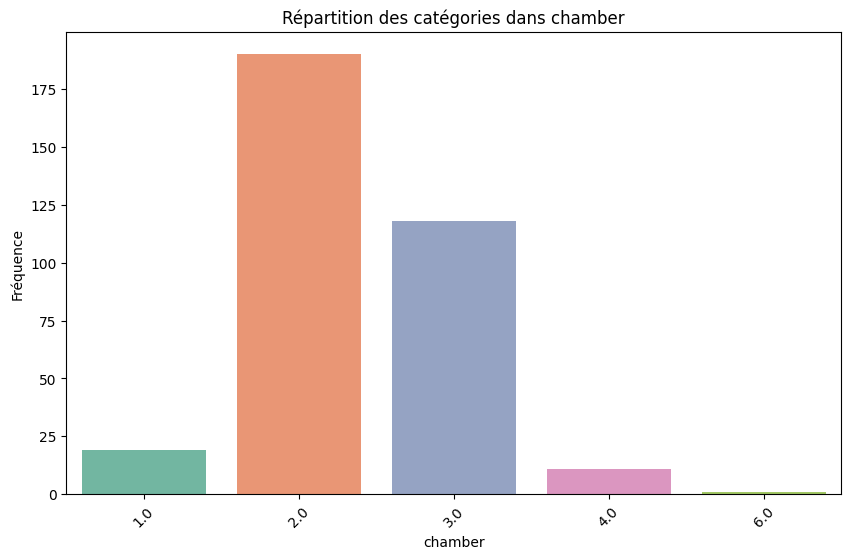

In [269]:
analyse_categorique(df,'chamber')

Distribution des valeurs pour la colonne salon :
salon
1.0    498
2.0    132
3.0      7
0.0      3
Name: count, dtype: int64


/home/rajarabii/projects/data_analyse_avito/src/functions.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataframe, x=colone, palette='Set2')


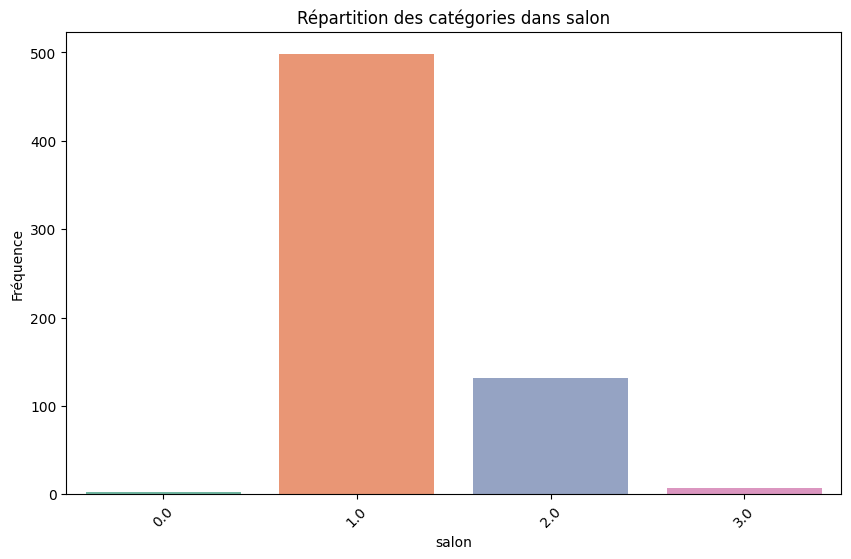

In [270]:
analyse_categorique(df,'salon')

Distribution des valeurs pour la colonne toilete :
toilete
2.0      187
1.0      125
3.0       18
0.0        2
100.0      1
91.0       1
4.0        1
59.0       1
Name: count, dtype: int64


/home/rajarabii/projects/data_analyse_avito/src/functions.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataframe, x=colone, palette='Set2')


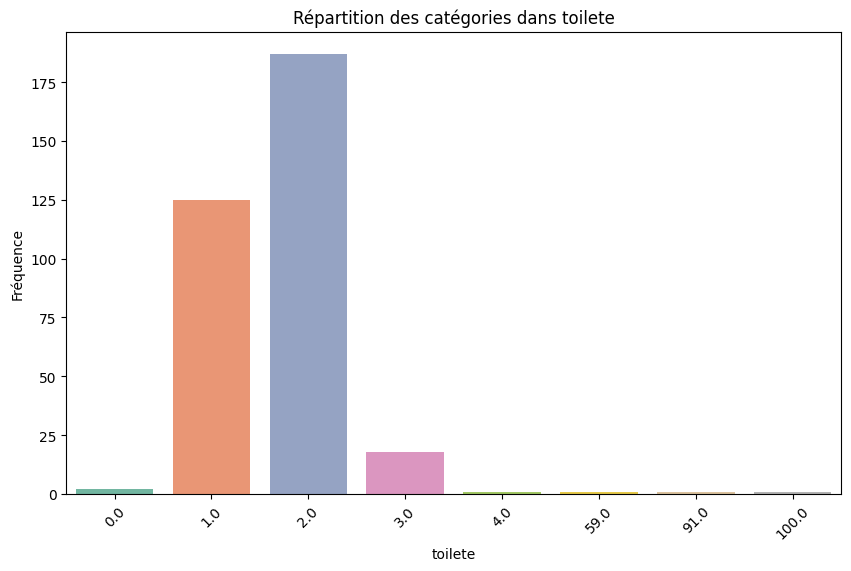

In [271]:
analyse_categorique(df,'toilete')

etude de la distrubution de prix et surface des appartements a vendre

Statistiques descriptives pour la colonne area :
Moyenne : 97.30880230880231
Médiane : 90.0
Écart-type : 40.543844751859496
Coefficient d'asymétrie (skewness) : 2.5962838988965085
La distribution est asymétrique vers la droite (asymétrie positive)


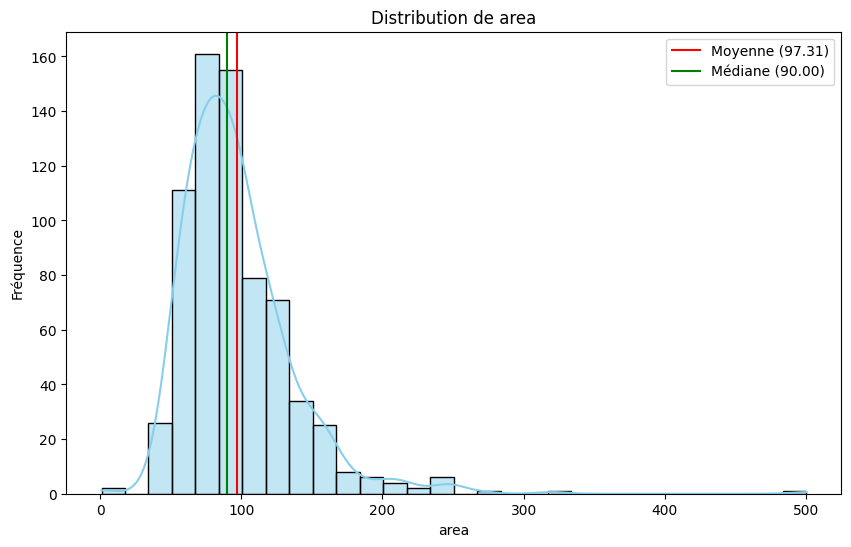

In [272]:
analyse_statistique_et_asymetire(df,'area')

Statistiques descriptives pour la colonne new_price :
Moyenne : 1339826.9026548672
Médiane : 967200.0
Écart-type : 2060124.9775677118
Coefficient d'asymétrie (skewness) : 9.508464065822032
La distribution est asymétrique vers la droite (asymétrie positive)


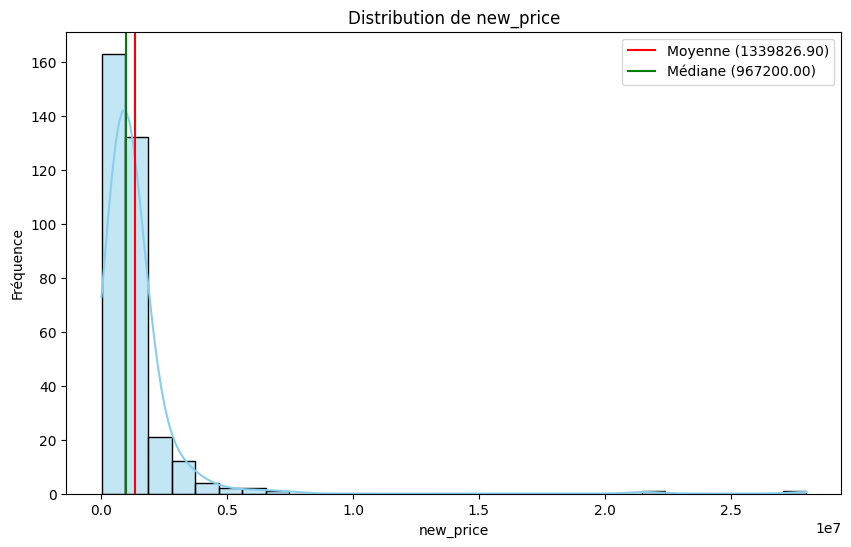

In [273]:
analyse_statistique_et_asymetire(df[df['type_de_vente']=='a vendre'],'new_price')

etude de la distrubution de prix et surface des appartements a louer

Statistiques descriptives pour la colonne new_price :
Moyenne : 3814.1116751269037
Médiane : 2300.0
Écart-type : 4548.778804386551
Coefficient d'asymétrie (skewness) : 1.6668308341871758
La distribution est asymétrique vers la droite (asymétrie positive)


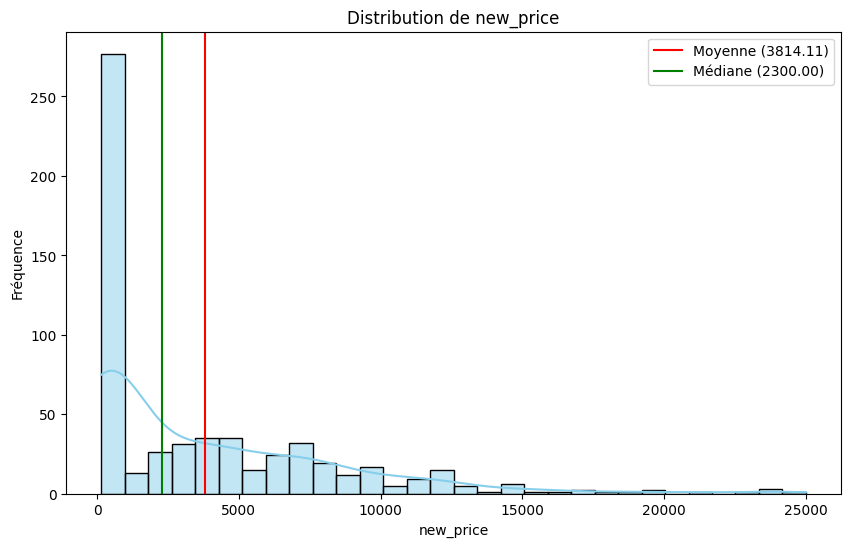

In [274]:
analyse_statistique_et_asymetire(df[df['type_de_vente']=='a louer'],'new_price')

In [275]:
df_knn = df.copy()

Gestion des Valeurs Manquantes

In [276]:
pourcentage_manquantes = df.isnull().mean() * 100
pourcentage_manquantes

title             0.094073
price            12.511759
location          0.094073
type_de_vente     0.000000
salon            39.793039
chamber          68.109125
toilete          68.391345
area             34.807150
link              0.000000
new_price        12.511759
dtype: float64

gestionner les donnes de type numuriques

In [277]:
df_louer = df[df['type_de_vente']=='a louer']
df_vendre = df[df['type_de_vente']=='a vendre']


In [278]:
#remplacer les valeurs null dans les nombres des salons et chambres et toiletes
df_louer.new_price.isna().sum()

np.int64(34)

In [279]:
remplacer_valuer_null(df_louer,'new_price')
df_louer.new_price.isna().sum()

/home/rajarabii/projects/data_analyse_avito/src/functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colone] = df[colone].apply(lambda x :replace(pd.Series.median,x,df,colone))


np.int64(0)

In [280]:
df.area.isna().sum()

np.int64(370)

In [281]:
remplacer_valuer_null(df,'area')
df.area.isna().sum()


np.int64(0)

In [282]:
df_vendre.new_price.isna().sum()

np.int64(99)

In [283]:
remplacer_valuer_null(df_vendre,'new_price')
df_vendre.new_price.isna().sum()

/home/rajarabii/projects/data_analyse_avito/src/functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colone] = df[colone].apply(lambda x :replace(pd.Series.median,x,df,colone))


np.int64(0)

In [284]:
remplacer_valuer_null(df,'salon')
df.salon.isna().sum()

np.int64(0)

In [285]:
remplacer_valuer_null(df,'chamber')
df.chamber.isna().sum()

np.int64(0)

In [286]:
remplacer_valuer_null(df,'toilete')
df.toilete.isna().sum()

np.int64(0)

In [287]:
df.head()

,title,price,location,type_de_vente,salon,chamber,toilete,area,link,new_price
0,Appartement location de vacances à Meknès,300 DH /Nuit,Meknès,a louer,1.0,2.0,2.0,90.0,https://www.avito.ma/fr/autre_secteur/location...,300.0
1,appartement à louer,2 400 DH,Casablanca,a louer,1.0,2.0,2.0,50.0,https://www.avito.ma/fr/al_qods/appartements/a...,2400.0
2,Appartement beru à louer 150 m² à Temara,6 500 DH,Temara,a louer,1.0,2.0,2.0,150.0,https://www.avito.ma/fr/autre_secteur/appartem...,6500.0
3,Appartement près a casanearshor sidi maarouf,3 000 DH,Casablanca,a louer,1.0,2.0,2.0,56.0,https://www.avito.ma/fr/sidi_maarouf/apparteme...,3000.0
4,Appartement 84 m²Al Baraka à Dcheïra El Jihadia,701 720 DH,Dcheïra El Jihadia,a vendre,1.0,3.0,2.0,84.0,https://www.avito.ma/fr/dche%C3%AFra_el_jihadi...,701720.0


In [288]:
df_louer.head()

,title,price,location,type_de_vente,salon,chamber,toilete,area,link,new_price
0,Appartement location de vacances à Meknès,300 DH /Nuit,Meknès,a louer,NaN,NaN,NaN,NaN,https://www.avito.ma/fr/autre_secteur/location...,300.0
1,appartement à louer,2 400 DH,Casablanca,a louer,1.0,NaN,NaN,50.0,https://www.avito.ma/fr/al_qods/appartements/a...,2400.0
2,Appartement beru à louer 150 m² à Temara,6 500 DH,Temara,a louer,1.0,NaN,NaN,150.0,https://www.avito.ma/fr/autre_secteur/appartem...,6500.0
3,Appartement près a casanearshor sidi maarouf,3 000 DH,Casablanca,a louer,1.0,NaN,NaN,56.0,https://www.avito.ma/fr/sidi_maarouf/apparteme...,3000.0
6,Appartement 3 chambres vide à louer,6 800 DH,Mohammedia,a louer,1.0,NaN,NaN,95.0,https://www.avito.ma/fr/mimosas/appartements/A...,6800.0


In [289]:
df_vendre.head()

,title,price,location,type_de_vente,salon,chamber,toilete,area,link,new_price
4,Appartement 84 m²Al Baraka à Dcheïra El Jihadia,701 720 DH,Dcheïra El Jihadia,a vendre,1.0,3.0,2.0,84.0,https://www.avito.ma/fr/dche%C3%AFra_el_jihadi...,701720.0
5,Appartement à vendre 79 m² à Casablanca,580 000 DH,Casablanca,a vendre,2.0,2.0,1.0,79.0,https://www.avito.ma/fr/sidi_moumen/appartemen...,580000.0
7,Appart. 79 m2 Angle Chouka Omarya-Hay Chrifa,760 000 DH,Casablanca,a vendre,2.0,2.0,1.0,79.0,https://www.avito.ma/fr/a%C3%AFn_chock/apparte...,760000.0
9,Appart. Haut Stand 104 m2 Résid. Fermée Califo...,1 560 000 DH,Casablanca,a vendre,1.0,3.0,2.0,104.0,https://www.avito.ma/fr/californie/appartement...,1560000.0
10,CMN-MA-1136 - Bureau à vendre à Maârif,1 100 000 DH,Casablanca,a vendre,NaN,1.0,91.0,NaN,https://www.avito.ma/fr/maarif/bureaux/CMN_MA_...,1100000.0


In [290]:
df_combined = pd.concat([df_vendre,df_louer],ignore_index=True)

In [291]:
df_combined['salon'] = df['salon']
df_combined['chamber'] = df['chamber']
df_combined['toilete'] = df['toilete']
df_combined['area'] = df['area']

In [292]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1062 non-null   object 
 1   price          930 non-null    object 
 2   location       1062 non-null   object 
 3   type_de_vente  1063 non-null   object 
 4   salon          1063 non-null   float64
 5   chamber        1063 non-null   float64
 6   toilete        1063 non-null   float64
 7   area           1063 non-null   float64
 8   link           1063 non-null   object 
 9   new_price      1063 non-null   float64
dtypes: float64(5), object(5)
memory usage: 83.2+ KB


je vais essayer avec le Knn

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1062 non-null   object 
 1   price          930 non-null    object 
 2   location       1062 non-null   object 
 3   type_de_vente  386 non-null    object 
 4   salon          640 non-null    float64
 5   chamber        339 non-null    float64
 6   toilete        336 non-null    float64
 7   area           693 non-null    float64
 8   link           1063 non-null   object 
dtypes: float64(4), object(5)
memory usage: 74.9+ KB


In [294]:
df_knn.isna().sum()

title              1
price            133
location           1
type_de_vente      0
salon            423
chamber          724
toilete          727
area             370
link               0
new_price        133
dtype: int64

In [296]:
import pandas as pd
from sklearn.impute import KNNImputer


# Colonnes pertinentes pour l'imputation
columns_to_impute = ['area', 'chamber', 'toilete', 'salon']

# Appliquer KNNImputer
imputer = KNNImputer(n_neighbors=2)
df_imputed = pd.DataFrame(imputer.fit_transform(df_knn[columns_to_impute]), columns=columns_to_impute)

# Arrondir les colonnes 'chamber' et 'salon' pour obtenir des entiers
df_imputed['chamber'] = df_imputed['chamber'].round().astype(int)
df_imputed['salon'] = df_imputed['salon'].round().astype(int)
df_imputed['toilete'] = df_imputed['toilete'].round().astype(int)

print("Données après imputation et arrondi des colonnes 'chamber' et 'salon':")
print(df_imputed)


Données après imputation et arrondi des colonnes 'chamber' et 'salon':
            area  chamber  toilete  salon
0      97.308802        2        2      1
1      50.000000        2        1      1
2     150.000000        2        2      1
3      56.000000        2        1      1
4      84.000000        3        2      1
...          ...      ...      ...    ...
1058  151.000000        3        2      1
1059   90.000000        2        2      1
1060  110.000000        2        1      1
1061   99.000000        3        2      1
1062   85.000000        2        2      1

[1063 rows x 4 columns]


In [298]:
df_imputed[['title','type_de_vente','location','new_price']] = df_combined[['title','type_de_vente','location','new_price']]

In [302]:
df_imputed.head()

,area,chamber,toilete,salon,title,type_de_vente,location,new_price
0,97.308802,2,2,1,Appartement 84 m²Al Baraka à Dcheïra El Jihadia,a vendre,Dcheïra El Jihadia,701720.0
1,50.000000,2,1,1,Appartement à vendre 79 m² à Casablanca,a vendre,Casablanca,580000.0
2,150.000000,2,2,1,Appart. 79 m2 Angle Chouka Omarya-Hay Chrifa,a vendre,Casablanca,760000.0
3,56.000000,2,1,1,Appart. Haut Stand 104 m2 Résid. Fermée Califo...,a vendre,Casablanca,1560000.0
4,84.000000,3,2,1,CMN-MA-1136 - Bureau à vendre à Maârif,a vendre,Casablanca,1100000.0


Détection et Traitement des Valeurs Aberrantes

In [303]:
df_combined.toilete.unique()

array([  2.,   1.,  91., 100.,   3.,   0.,   4.,  59.])

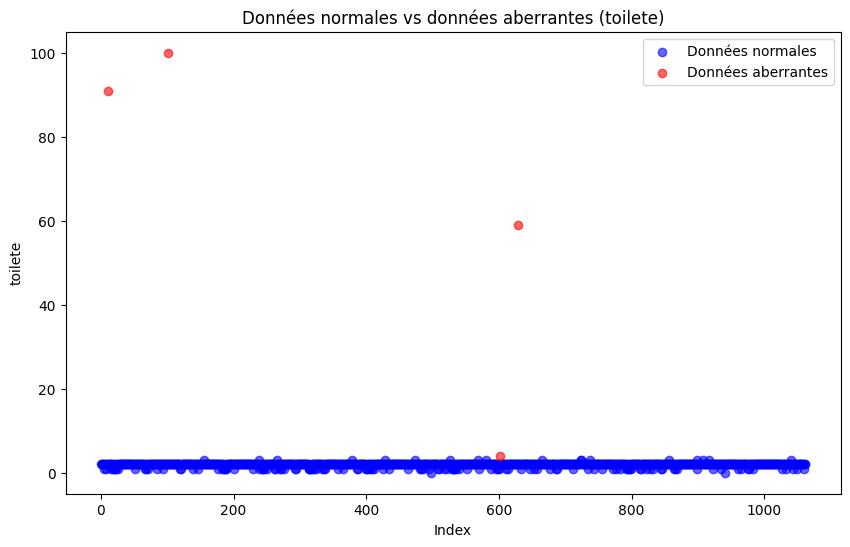

In [304]:
aberrant_toilete=detecter_aberrantes_par_frequence_nombre(df_combined,'toilete',2)

In [305]:
aberrant_toilete

,title,price,location,type_de_vente,salon,chamber,toilete,area,link,new_price
10,Appartement à vendre 44 m² à Casablanca,864 000 DH,Casablanca,a vendre,1.0,1.0,91.0,90.0,https://www.avito.ma/fr/sidi_maarouf/apparteme...,864000.0
101,Vente Appartement façade à Maghreb Arabi KENITRA,595 000 DH,Kénitra,a vendre,1.0,3.0,100.0,49.0,https://www.avito.ma/fr/al_maghrib_al_arabi/ap...,595000.0
602,appartement à laouer,4 500 DH,Agadir,a louer,2.0,3.0,4.0,270.0,https://www.avito.ma/fr/hay_salam/appartements...,4500.0
628,Appartement à louer 50 m² à Casablanca,6 200 DH,Casablanca,a louer,1.0,1.0,59.0,90.0,https://www.avito.ma/fr/belv%C3%A9d%C3%A8re/ap...,6200.0


mettre a jour les annomalies toilete

In [306]:
df_combined.loc[aberrant_toilete.index, 'toilete'] = 1


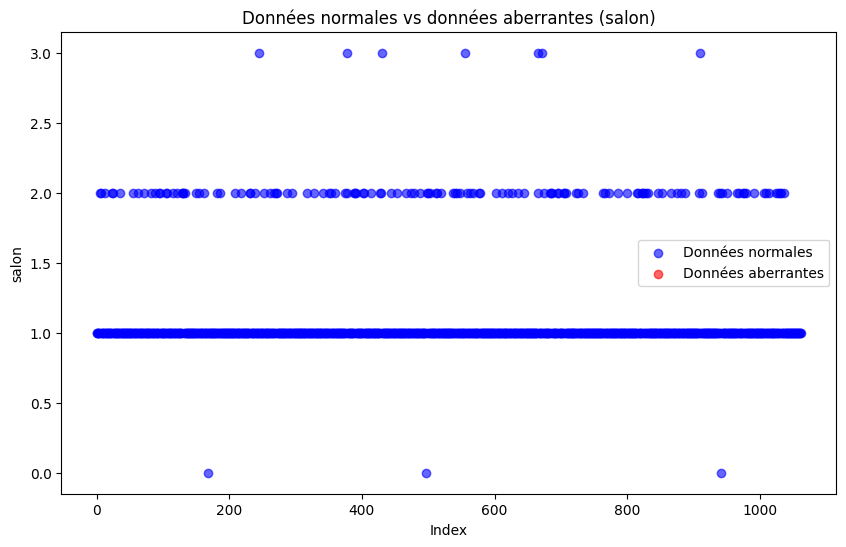

In [307]:
aberrant_salon = detecter_aberrantes_par_frequence_nombre(df_combined,'salon',1)

In [308]:
aberrant_salon

,title,price,location,type_de_vente,salon,chamber,toilete,area,link,new_price


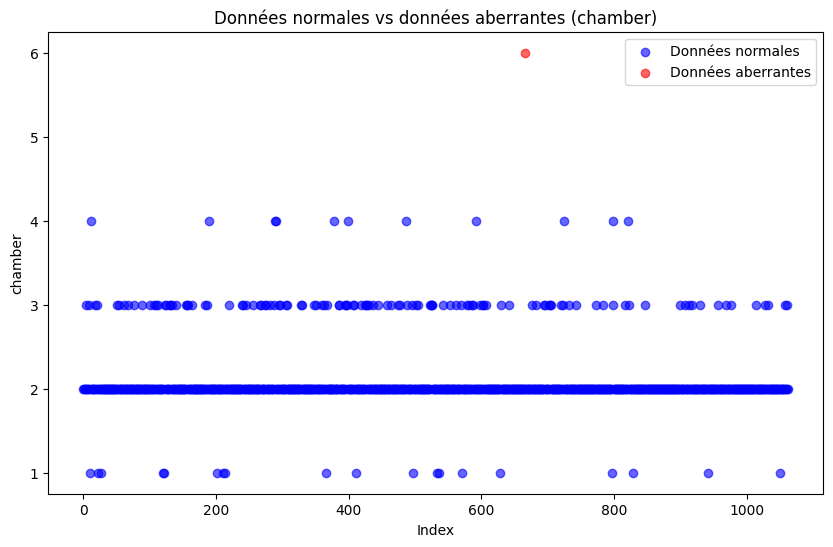

In [309]:
aberrant_chamber = detecter_aberrantes_par_frequence_nombre(df_combined,'chamber',2)

In [310]:
aberrant_chamber

,title,price,location,type_de_vente,salon,chamber,toilete,area,link,new_price
665,Appartement grand et propre équipé,350 DH /Nuit,Ifrane,a louer,3.0,6.0,3.0,103.0,https://www.avito.ma/fr/atlas/locations_de_vac...,350.0


mettre a jour les annomalies de chambre

In [311]:
df_combined.loc[aberrant_chamber.index,'chamber'] = 3

detecter les aberrantes par Z_score

/home/rajarabii/projects/data_analyse_avito/src/functions.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'z_score_{colone}'] = (data[colone] - data[colone].mean()) / data[colone].std()
/home/rajarabii/projects/data_analyse_avito/src/functions.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['aberrant'] = np.abs(data[f'z_score_{colone}']) > 3


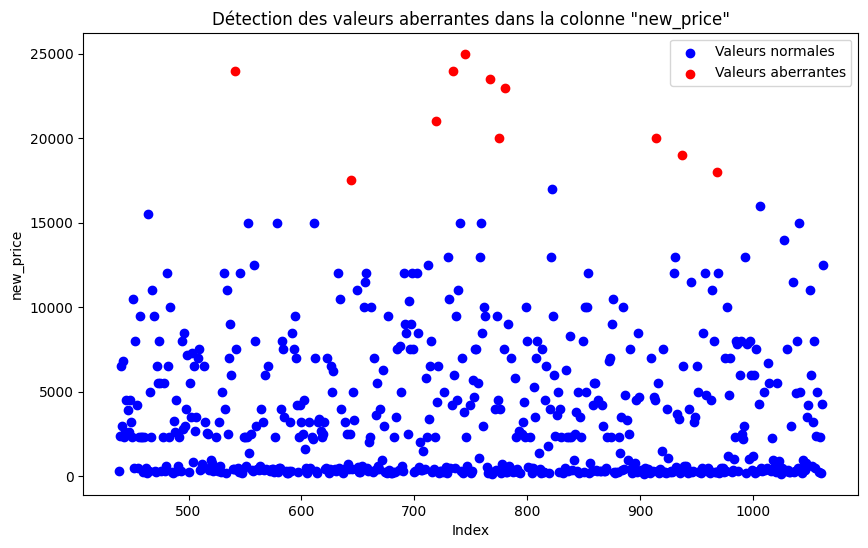

In [315]:
aberrante_price_louer=detecter_et_plot_zscore(df_combined[df_combined['type_de_vente']=='a louer'],'new_price')

/home/rajarabii/projects/data_analyse_avito/src/functions.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'z_score_{colone}'] = (data[colone] - data[colone].mean()) / data[colone].std()
/home/rajarabii/projects/data_analyse_avito/src/functions.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['aberrant'] = np.abs(data[f'z_score_{colone}']) > 3


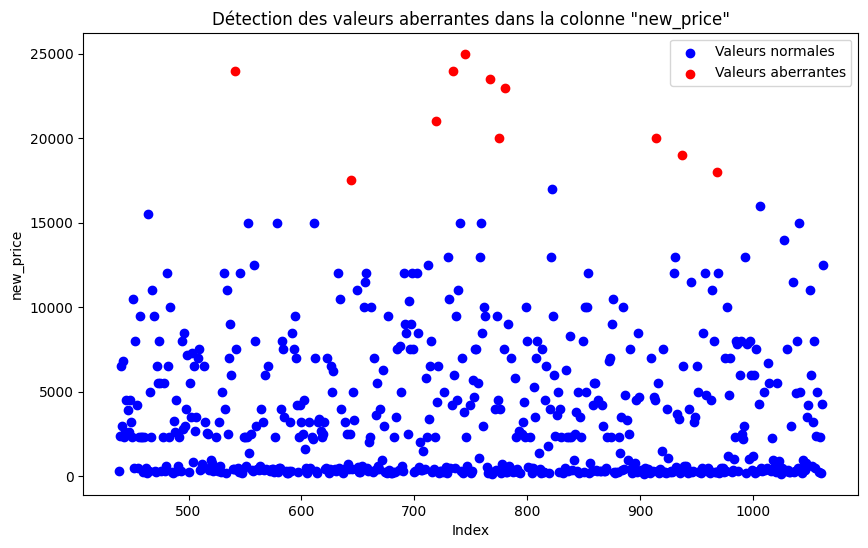

In [317]:
aberrante_price_louer=detecter_et_plot_zscore(df_combined[df_combined['type_de_vente']=='a louer'],'new_price')

detecter les aberrantes par frequance 

In [340]:
df_imputed.columns

Index(['new_price', 'area', 'chamber', 'toilete', 'salon', 'title',
       'type_de_vente', 'location'],
      dtype='object')

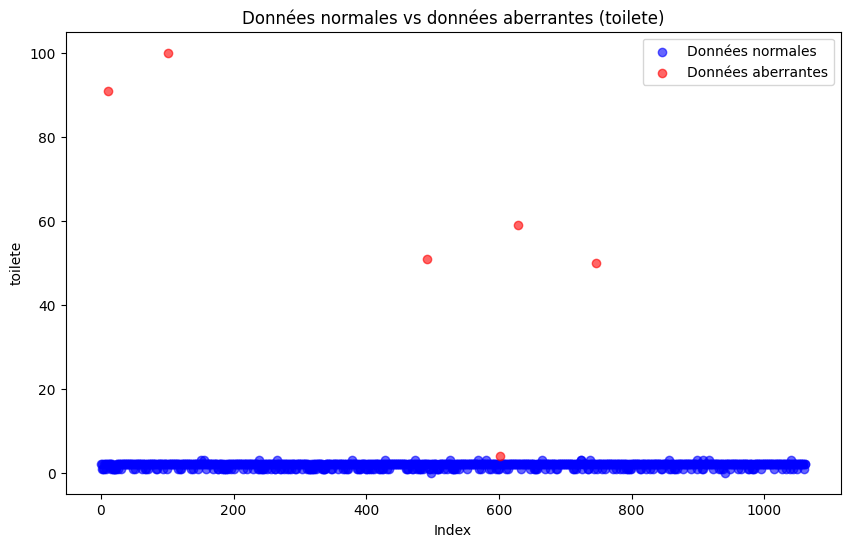

In [318]:
aberrant_toilete=detecter_aberrantes_par_frequence_nombre(df_imputed,'toilete',2)

In [319]:
aberrant_toilete

,area,chamber,toilete,salon,title,type_de_vente,location,new_price
10,107.5,1,91,2,Appartement à vendre 44 m² à Casablanca,a vendre,Casablanca,864000.0
101,49.0,3,100,1,Vente Appartement façade à Maghreb Arabi KENITRA,a vendre,Kénitra,595000.0
491,48.0,2,51,1,Appartement en location journalière maarif,a louer,Casablanca,580.0
602,270.0,3,4,2,appartement à laouer,a louer,Agadir,4500.0
628,107.5,1,59,2,Appartement à louer 50 m² à Casablanca,a louer,Casablanca,6200.0
747,48.0,2,50,1,appartement,a louer,Casablanca,599.0


In [320]:
df_imputed.loc[aberrant_toilete.index,'toilete'] = 1

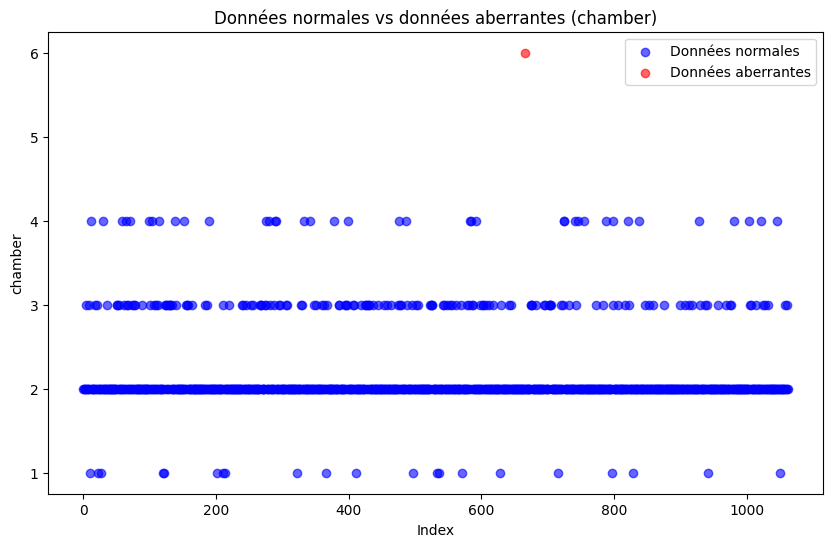

In [321]:
aberrant_chamber=detecter_aberrantes_par_frequence_nombre(df_imputed,'chamber',2)

In [322]:
aberrant_chamber

,area,chamber,toilete,salon,title,type_de_vente,location,new_price
665,103.0,6,3,3,Appartement grand et propre équipé,a louer,Ifrane,350.0


In [323]:
df_imputed.loc[aberrant_chamber.index,'chamber'] = 2

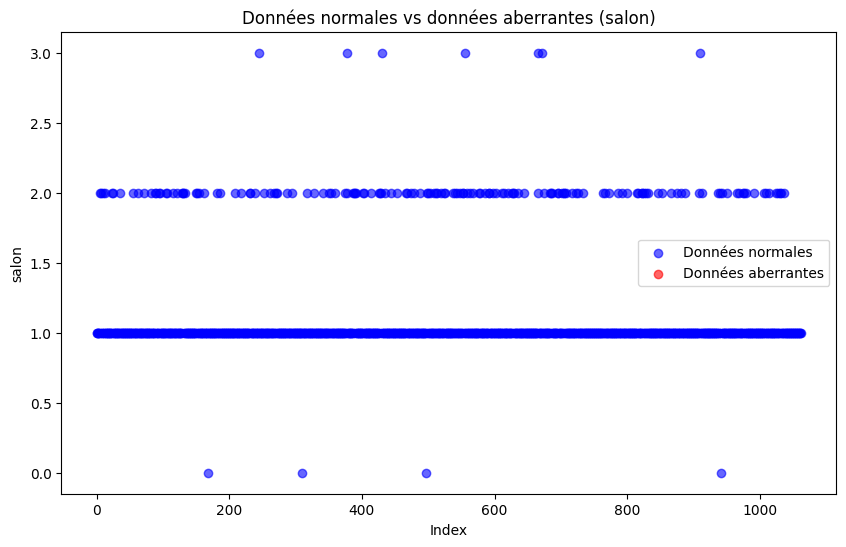

In [324]:
aberrant_salon=detecter_aberrantes_par_frequence_nombre(df_imputed,'salon',2)

In [325]:
aberrant_salon

,area,chamber,toilete,salon,title,type_de_vente,location,new_price


-190487.5
2185292.5


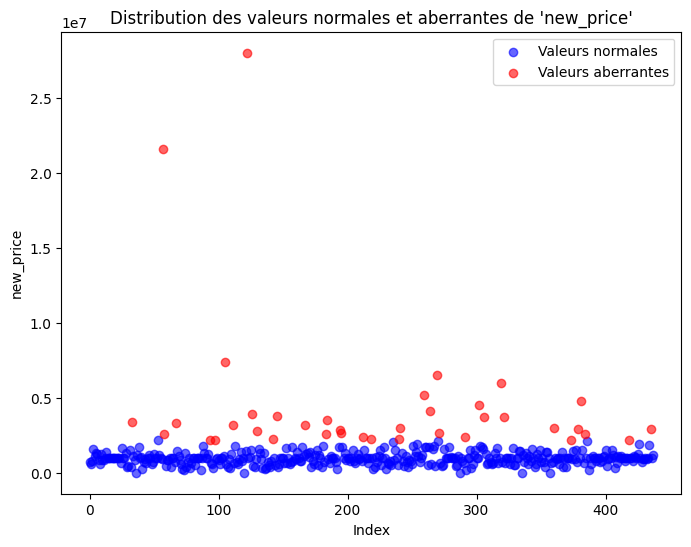

In [326]:
iqr_aberrant_price_vendre = detecter_avec_IQR(df_imputed[df_imputed['type_de_vente']=='a vendre'],'new_price')

/home/rajarabii/projects/data_analyse_avito/src/functions.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'z_score_{colone}'] = (data[colone] - data[colone].mean()) / data[colone].std()
/home/rajarabii/projects/data_analyse_avito/src/functions.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['aberrant'] = np.abs(data[f'z_score_{colone}']) > 3


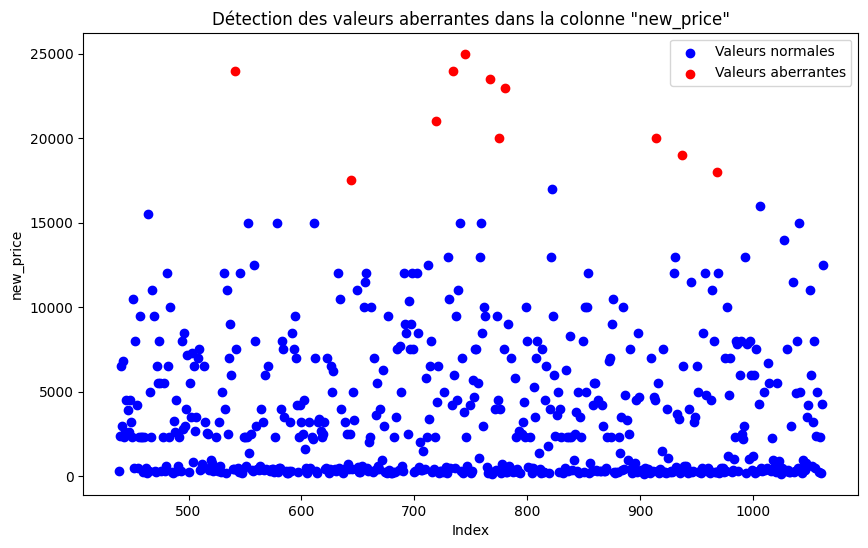

In [327]:
iqr_aberrant_price_louer= detecter_et_plot_zscore(df_imputed[df_imputed['type_de_vente']=='a louer'],'new_price')

In [328]:
iqr_aberrant_price_louer

,area,chamber,toilete,salon,title,type_de_vente,location,new_price,z_score_new_price,aberrant
541,97.308802,2,2,1,Appartement à louer 240 m² à Rabat,a louer,Rabat,24000.0,4.568575,True
644,97.308802,2,2,1,Appartement de 77m très bien placé à l'oasis,a louer,Casablanca,17500.0,3.103440,True
719,97.308802,2,2,1,appartement standing neuf a Hay riad,a louer,Rabat,21000.0,3.892359,True
734,89.000000,2,1,1,appartement standing meublé a souissi,a louer,Rabat,24000.0,4.568575,True
745,100.000000,4,2,1,Appartement standing a louer a souissi,a louer,Rabat,25000.0,4.793980,True
767,100.000000,2,2,2,Appartement standing 5piece orangeraie,a louer,Rabat,23500.0,4.455872,True
775,84.000000,2,2,1,Appartement standing neuf a louer Hay riad,a louer,Rabat,20000.0,3.666953,True
780,120.000000,2,2,1,Rez de jardin standing vide a l orangeraie,a louer,Rabat,23000.0,4.343170,True
914,97.308802,2,2,1,Appartement meublé à louer 240 m² à Rabat,a louer,Rabat,20000.0,3.666953,True
937,117.000000,3,2,2,Studio-Appartement-Haut-Standing-Gueliz,a louer,Marrakech,19000.0,3.441548,True


In [329]:
# Mettre à jour les valeurs de 'new_price' où 'type_de_vente' est 'a louer' et les indices sont dans iqr_aberrant_price_louer.index
mask_louer = df_imputed['type_de_vente'] == 'a louer'

df_imputed.loc[mask_louer & df_imputed.index.isin(iqr_aberrant_price_louer.index), 'new_price'] = 2500

In [330]:
iqr_aberrant_price_vendre

,area,chamber,toilete,salon,title,type_de_vente,location,new_price
33,97.308802,2,2,1,Appartement haut standing secteur 23,a vendre,Rabat,3400000.0
57,70.000000,2,2,1,Appartement 127m2 à Les Princesses Casablanca,a vendre,Casablanca,21600000.0
58,100.000000,4,2,1,Appartement à vendre à GUÉLIZ,a vendre,Marrakech,2600000.0
67,185.000000,3,1,1,Appartement à vendre 144 m² à Rabat,a vendre,Rabat,3300000.0
93,110.000000,2,2,1,Appartement à vendre 130 m² à Rabat,a vendre,Rabat,2200000.0
97,97.308802,2,2,1,Appartement 127m² Gauthier,a vendre,Casablanca,2220000.0
105,53.000000,2,2,1,appartement à vendre salé Tabriquet,a vendre,Salé,7400000.0
111,54.000000,2,2,1,"Souissi, Rabat Square Eagle Hills Appart à Vendre",a vendre,Rabat,3220000.0
122,97.308802,2,2,1,appartement à vendre,a vendre,Agadir,28000000.0
126,200.000000,3,2,1,Grand Appartement à vendre 215 m² 4 ch ville v...,a vendre,Bouskoura,3900000.0


-7375.0
13225.0


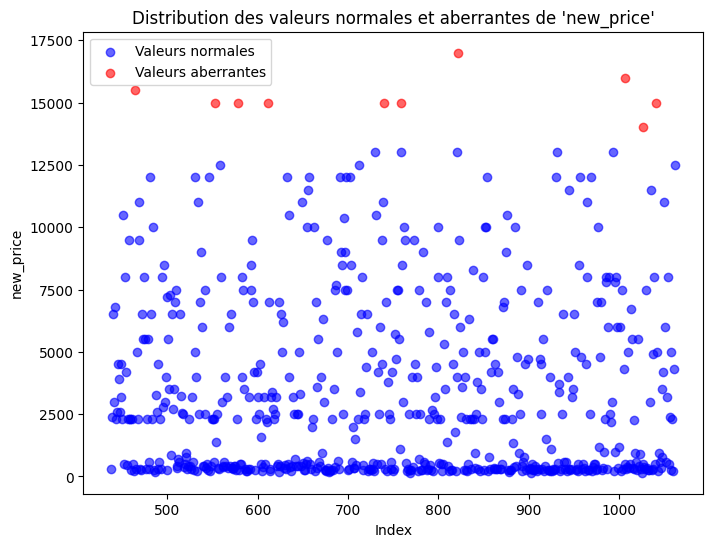

In [331]:
iqr_aberrant_price_louer = detecter_avec_IQR(df_imputed[df_imputed['type_de_vente']=='a louer'],'new_price')

In [332]:
iqr_aberrant_price_louer.shape

(10, 8)

In [333]:
df_imputed['new_price'][df_imputed['type_de_vente']=='a louer'].median()

np.float64(2300.0)

In [334]:
# Mettre à jour les valeurs de 'new_price' où 'type_de_vente' est 'a louer' et les indices sont dans iqr_aberrant_price_louer.index
mask_louer = df_imputed['type_de_vente'] == 'a louer'

df_imputed.loc[mask_louer & df_imputed.index.isin(iqr_aberrant_price_louer.index), 'new_price'] = 2500

In [335]:
df_imputed['new_price'].max()

np.float64(28000000.0)

Standardisation et Normalisation

In [336]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Colonnes à standardiser
colonnes_a_standardiser = ['new_price', 'area']

# Appliquer la standardisation sur les colonnes sélectionnées
scaler = StandardScaler()
df_combined[['new_price_standariser', 'area_standariser']] = scaler.fit_transform(df_combined[colonnes_a_standardiser])
df_imputed[['new_price_standariser', 'area_standariser']] = scaler.fit_transform(df_imputed[colonnes_a_standardiser])

print(df_combined.head())
print(df_imputed.head())


                                               title         price  \
0    Appartement 84 m²Al Baraka à Dcheïra El Jihadia    701 720 DH   
1            Appartement à vendre 79 m² à Casablanca    580 000 DH   
2       Appart. 79 m2 Angle Chouka Omarya-Hay Chrifa    760 000 DH   
3  Appart. Haut Stand 104 m2 Résid. Fermée Califo...  1 560 000 DH   
4             CMN-MA-1136 - Bureau à vendre à Maârif  1 100 000 DH   

             location type_de_vente  salon  chamber  toilete   area  \
0  Dcheïra El Jihadia      a vendre    1.0      2.0      2.0   90.0   
1          Casablanca      a vendre    1.0      2.0      2.0   50.0   
2          Casablanca      a vendre    1.0      2.0      2.0  150.0   
3          Casablanca      a vendre    1.0      2.0      2.0   56.0   
4          Casablanca      a vendre    1.0      3.0      2.0   84.0   

                                                link  new_price  \
0  https://www.avito.ma/fr/dche%C3%AFra_el_jihadi...   701720.0   
1  https://www.avi

la distribution des classes(SMOT)

In [337]:
df_combined['type_de_vente'].value_counts()



type_de_vente
a louer     625
a vendre    438
Name: count, dtype: int64

In [338]:
df_imputed['type_de_vente'].value_counts()

type_de_vente
a louer     625
a vendre    438
Name: count, dtype: int64

In [339]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd


encoder = OrdinalEncoder()

df_combined['location_encoded'] = encoder.fit_transform(df_combined[['location']])
df_imputed['location_encoded'] = encoder.fit_transform(df_imputed[['location']])


In [340]:
df_combined['location_encoded'].isna().sum()

np.int64(1)

In [341]:
df_imputed['location_encoded'].isna().sum()

np.int64(1)

In [342]:
df_combined= df_combined.dropna(subset=['location_encoded'])
df_imputed= df_imputed.dropna(subset=['location_encoded'])


In [343]:
df_combined.location.unique().shape

(54,)

In [344]:
df_combined.location_encoded.unique().shape

(54,)

In [345]:
from imblearn.over_sampling import SMOTE

# Sélectionner les caractéristiques et la classe cible
X = df_combined[['new_price', 'salon', 'chamber', 'toilete', 'area','location_encoded','new_price_standariser','area_standariser']]
y = df_combined['type_de_vente']

X = df_imputed[['new_price', 'salon', 'chamber', 'toilete', 'area','location_encoded','new_price_standariser','area_standariser']]
y = df_imputed['type_de_vente']


# Appliquer SMOTE pour équilibrer les classes
smote = SMOTE(sampling_strategy='auto')  # 'auto' équilibre les classes à parts égales
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled_knn, y_resampled_knn = smote.fit_resample(X, y)

In [346]:
X_resampled['location_encoded'] = X_resampled['location_encoded'].apply(lambda x:round(x))
X_resampled_knn['location_encoded'] = X_resampled_knn['location_encoded'].apply(lambda x:round(x))

In [347]:
X_resampled['chamber'] = X_resampled['chamber'].apply(lambda x:round(x))
X_resampled['salon'] = X_resampled['salon'].apply(lambda x:round(x))
X_resampled['toilete'] = X_resampled['toilete'].apply(lambda x:round(x))

In [348]:
X_resampled_knn['chamber'] = X_resampled_knn['chamber'].apply(lambda x:round(x))
X_resampled_knn['salon'] = X_resampled_knn['salon'].apply(lambda x:round(x))
X_resampled_knn['toilete'] = X_resampled_knn['toilete'].apply(lambda x:round(x))

In [349]:
set(X_resampled.location_encoded.unique())==set(df_combined.location_encoded.unique())

True

In [350]:
set(X_resampled_knn.location_encoded.unique())==set(df_combined.location_encoded.unique())

True

In [351]:
y_resampled.value_counts()

type_de_vente
a vendre    625
a louer     625
Name: count, dtype: int64

In [352]:
X_resampled

,new_price,salon,chamber,toilete,area,location_encoded,new_price_standariser,area_standariser
0,7.017200e+05,1,2,2,97.308802,15,0.138358,-0.001118
1,5.800000e+05,1,2,1,50.000000,11,0.046069,-1.444905
2,7.600000e+05,1,2,2,150.000000,11,0.182546,1.606930
3,1.560000e+06,1,2,1,56.000000,11,0.789111,-1.261795
4,1.100000e+06,1,3,2,84.000000,11,0.440336,-0.407281
...,...,...,...,...,...,...,...,...
1245,9.672000e+05,1,2,1,69.106012,5,0.339646,-0.861821
1246,3.852556e+05,1,2,1,65.153362,24,-0.101587,-0.982449
1247,1.449397e+06,1,1,1,66.567784,11,0.705251,-0.939284
1248,2.423919e+05,1,2,1,88.206057,5,-0.209907,-0.278919


In [353]:
X_resampled['type_de_vente'] = y_resampled

In [354]:
X_resampled_knn['type_de_vente'] = y_resampled_knn

In [355]:
data_equilibre_normal = X_resampled
data_equilibre_knn = X_resampled_knn

 Sélection et Réduction des Caractéristiques

In [356]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd


encoder = OrdinalEncoder()

data_equilibre_normal['type_de_vente_encoded'] = encoder.fit_transform(data_equilibre_normal[['type_de_vente']])


In [357]:
data_equilibre_knn['type_de_vente_encoded'] = encoder.fit_transform(data_equilibre_knn[['type_de_vente']])


In [358]:
data_equilibre_knn.columns

Index(['new_price', 'salon', 'chamber', 'toilete', 'area', 'location_encoded',
       'new_price_standariser', 'area_standariser', 'type_de_vente',
       'type_de_vente_encoded'],
      dtype='object')

In [ ]:
#etude de correlation data par knn
data_equilibre_knn_louer = data_equilibre_knn[data_equilibre_knn['type_de_vente']=='a louer']
data_equilibre_knn_vendre = data_equilibre_knn[data_equilibre_knn['type_de_vente']=='a vendre']

correlation_knn_louer = data_equilibre_knn_louer[['salon', 'chamber', 'toilete', 'area', 'new_price']].corr()
correlation_knn_vendre = data_equilibre_knn_vendre[['salon', 'chamber', 'toilete', 'area', 'new_price']].corr()



In [362]:
correlation_knn_louer

,salon,chamber,toilete,area,new_price
salon,1.000000,0.245274,0.061541,0.392409,0.042222
chamber,0.245274,1.000000,0.135586,0.372506,-0.015001
toilete,0.061541,0.135586,1.000000,0.298202,-0.010748
area,0.392409,0.372506,0.298202,1.000000,-0.006264
new_price,0.042222,-0.015001,-0.010748,-0.006264,1.000000


In [364]:
correlation_knn_vendre

,salon,chamber,toilete,area,new_price
salon,1.000000,0.143762,0.069304,0.230232,-0.035385
chamber,0.143762,1.000000,0.233850,0.382015,-0.012781
toilete,0.069304,0.233850,1.000000,0.437043,0.048549
area,0.230232,0.382015,0.437043,1.000000,-0.027045
new_price,-0.035385,-0.012781,0.048549,-0.027045,1.000000


In [365]:
data_equilibre_mode_louer = data_equilibre_normal[data_equilibre_knn['type_de_vente']=='a louer']
data_equilibre_mode_vendre = data_equilibre_normal[data_equilibre_knn['type_de_vente']=='a vendre']

correlation_mode_louer = data_equilibre_mode_louer[['salon', 'chamber', 'toilete', 'area', 'new_price']].corr()
correlation_mode_vendre = data_equilibre_mode_vendre[['salon', 'chamber', 'toilete', 'area', 'new_price']].corr()



In [366]:
correlation_mode_louer

,salon,chamber,toilete,area,new_price
salon,1.000000,0.245274,0.061541,0.392409,0.042222
chamber,0.245274,1.000000,0.135586,0.372506,-0.015001
toilete,0.061541,0.135586,1.000000,0.298202,-0.010748
area,0.392409,0.372506,0.298202,1.000000,-0.006264
new_price,0.042222,-0.015001,-0.010748,-0.006264,1.000000


In [367]:
correlation_mode_vendre

,salon,chamber,toilete,area,new_price
salon,1.000000,0.147102,0.112994,0.217266,-0.032755
chamber,0.147102,1.000000,0.249670,0.365920,-0.007098
toilete,0.112994,0.249670,1.000000,0.408578,0.056113
area,0.217266,0.365920,0.408578,1.000000,-0.023401
new_price,-0.032755,-0.007098,0.056113,-0.023401,1.000000


In [368]:
data_equilibre_normal.head()

,new_price,salon,chamber,toilete,area,location_encoded,new_price_standariser,area_standariser,type_de_vente,type_de_vente_encoded
0,701720.0,1,2,2,97.308802,15,0.138358,-0.001118,a vendre,1.0
1,580000.0,1,2,1,50.000000,11,0.046069,-1.444905,a vendre,1.0
2,760000.0,1,2,2,150.000000,11,0.182546,1.606930,a vendre,1.0
3,1560000.0,1,2,1,56.000000,11,0.789111,-1.261795,a vendre,1.0
4,1100000.0,1,3,2,84.000000,11,0.440336,-0.407281,a vendre,1.0
